<a href="https://colab.research.google.com/github/meganhsu/ML100-Days/blob/master/Day077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp(x_train):
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(x_train)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 226us/step - loss: 2.0496 - acc: 0.2544 - val_loss: 2.1623 - val_acc: 0.2141
Epoch 2/10
50000/50000 [==============================] - 11s 223us/step - loss: 1.8402 - acc: 0.3384 - val_loss: 1.9222 - val_acc: 0.3196
Epoch 3/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.7440 - acc: 0.3724 - val_loss: 1.9270 - val_acc: 0.3022
Epoch 4/10
50000/50000 [==============================] - 11s 224us/step - loss: 1.6878 - acc: 0.4007 - val_loss: 1.8376 - val_acc: 0.3522
Epoch 5/10
50000/50000 [==============================] - 11s 225us/step - loss: 1.6389 - acc: 0.4155 - val_loss: 1.8627 - val_acc: 0.3584
Epoch 6/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.5897 - acc: 0.4338 - val_loss: 1.7619 - val_acc: 0.3679
Epoch 7/10
50000/50000 [==============================] - 11s 224us/

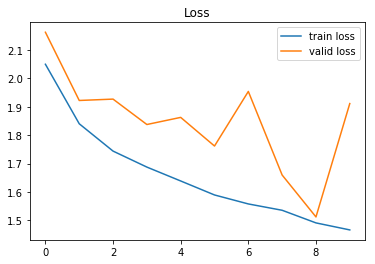

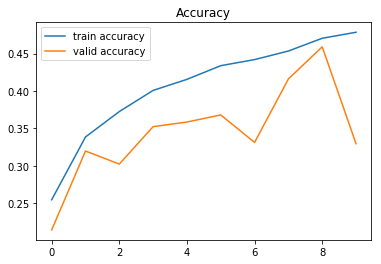

In [7]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()